In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in the data
im = fits.open('/Users/mr82/data/CloudCovErr/data/decaps/c4d_170119_085651_ooi_r_v1.fits.fz')

In [3]:
# how many extensions? 
#The DECam detector has many chips, see page 6 of 
#https://noirlab.edu/science/sites/default/files/media/archives/documents/scidoc0436.pdf
len(im)

61

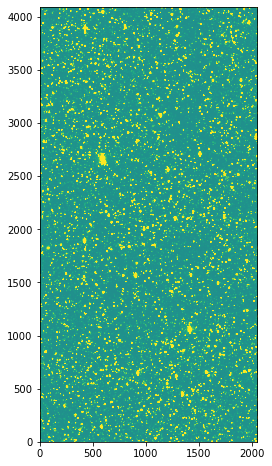

In [4]:
# is the first extension the file ds9 displayed?
plt.figure(figsize=(12,8))
plt.imshow(im[1].data, origin='lower', vmin=150, vmax=650)

In [5]:
# looking at the median value of the image so I can adjust the scaling to more easily see the stars
np.nanmedian(im[1].data)

407.2936

In [6]:
# image looks a lot like what we saw in ds9 -- same extension? Let's looks at the header
im[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 2046 / Axis length                                    
NAXIS2  =                 4094 / Axis length                                    
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
EXTNAME = 'S29     '           / Extension name                                 
DATE    = '2017-01-26T23:37:52' / Date FITS file was generated                  
IRAF-TLM= '2017-01-26T23:38:28' / Time of last modification                     
INHERIT =                    T / Inherits global header                         
WCSAXES =                   

In [7]:
# print the 'EXTNAME' for all of the image extensions to find 'N14' 
for num in range(1,len(im)):
    print("index =", num, "tile = ", im[num].header['EXTNAME'])

index = 1 tile =  S29
index = 2 tile =  S31
index = 3 tile =  S25
index = 4 tile =  S26
index = 5 tile =  S27
index = 6 tile =  S28
index = 7 tile =  S20
index = 8 tile =  S21
index = 9 tile =  S22
index = 10 tile =  S23
index = 11 tile =  S24
index = 12 tile =  S14
index = 13 tile =  S15
index = 14 tile =  S16
index = 15 tile =  S17
index = 16 tile =  S18
index = 17 tile =  S19
index = 18 tile =  S8
index = 19 tile =  S9
index = 20 tile =  S10
index = 21 tile =  S11
index = 22 tile =  S12
index = 23 tile =  S13
index = 24 tile =  S1
index = 25 tile =  S2
index = 26 tile =  S3
index = 27 tile =  S4
index = 28 tile =  S5
index = 29 tile =  S6
index = 30 tile =  S7
index = 31 tile =  N1
index = 32 tile =  N2
index = 33 tile =  N3
index = 34 tile =  N4
index = 35 tile =  N5
index = 36 tile =  N6
index = 37 tile =  N7
index = 38 tile =  N8
index = 39 tile =  N9
index = 40 tile =  N10
index = 41 tile =  N11
index = 42 tile =  N12
index = 43 tile =  N13
index = 44 tile =  N14
index = 45 tile

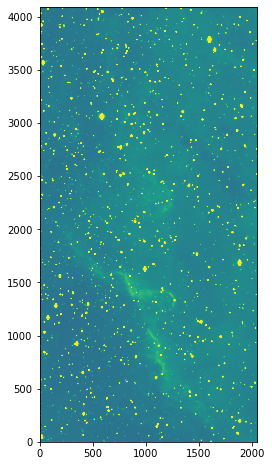

In [8]:
# check that the 'N14' image looks like the one in the paper 
plt.figure(figsize=(12,8))
plt.imshow(im[44].data, origin='lower', vmin=150, vmax=750)

In [9]:
# save the N14 image as it's own file so it's easier to look at in ds9 
hdu = fits.PrimaryHDU(data=im[44].data)
hdul = fits.HDUList([hdu])
hdul.writeto('/Users/mr82/data/CloudCovErr/mrr_notebooks/test_im.fits', overwrite=True)